In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
views_by_day = pd.read_parquet('~/Documents/features_views_by_day.parquet', engine='pyarrow')
views_categories = pd.read_parquet('~/Documents/features_views_categories.parquet', engine='pyarrow')
features = pd.read_parquet('~/Documents/features.parquet', engine='pyarrow')

In [4]:
views_by_day.head()

,trial_length_days,Affiliate Referral,Direct,Email,Missing,Organic Search,Organic Social,Other,Paid FB,Paid Insta Ambassadors,Paid Insta Stories,Paid Search (Brand),Paid Search (Non-brand),Podcast,Sponsored Newsletter,Sponsored Posts,Student Referral,Teacher Referral,Youtube Influencer,Youtube Pre-roll,success,day_1_total_watchtime,day_1_watched_video_length,day_2_total_watchtime,day_2_watched_video_length,day_3_total_watchtime,day_3_watched_video_length,day_-3_total_watchtime,day_-3_watched_video_length,day_-2_total_watchtime,day_-2_watched_video_length,day_-1_total_watchtime,day_-1_watched_video_length,United States,United Kingdom,Canada,India
0,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,670.0,1039.0,9807.0,6280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
1,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,3882.0,5423.0,2975.0,4050.0,2581.0,5642.0,0.0,0.0,0.0,0.0,1,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
3,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1468.0,2101.0,174.0,584.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1784.0,3758.0,4237.0,4992.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [5]:
views_categories.head()

,trial_length_days,Affiliate Referral,Direct,Email,Missing,Organic Search,Organic Social,Other,Paid FB,Paid Insta Ambassadors,Paid Insta Stories,Paid Search (Brand),Paid Search (Non-brand),Podcast,Sponsored Newsletter,Sponsored Posts,Student Referral,Teacher Referral,Youtube Influencer,Youtube Pre-roll,success,Accounting,Animation,Business Analytics,Crafts,Creative Writing,Culinary,Data Science,Film & Video,Finance,Fine Art,Freelance & Entrepreneurship,Game Design,Gaming,Graphic Design,Health & Wellness,Home Business,Human Resources,IT Security,Illustration,Languages,Leadership & Management,Marketing,Mobile Development,Music,other_subcategory,Photography,Product Management,Productivity,Sales,Teaching,UI/UX Design,Web Development,total_video_watchtime,United States,United Kingdom,Canada,India
0,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1284.0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5622.0,1,0,0,0
2,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.720577,0.0,0.0,0.0,0.0,0.0,0.0,0.279423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14691.0,1,0,0,0
3,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,1,0,0,0
4,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,1,0,0,0


In [6]:
features.head()

,trial_length_days,Affiliate Referral,Direct,Email,Missing,Organic Search,Organic Social,Other,Paid FB,Paid Insta Ambassadors,Paid Insta Stories,Paid Search (Brand),Paid Search (Non-brand),Podcast,Sponsored Newsletter,Sponsored Posts,Student Referral,Teacher Referral,Youtube Influencer,Youtube Pre-roll,success,day_1_total_watchtime,day_1_watched_video_length,day_2_total_watchtime,day_2_watched_video_length,day_3_total_watchtime,day_3_watched_video_length,day_-3_total_watchtime,day_-3_watched_video_length,day_-2_total_watchtime,day_-2_watched_video_length,day_-1_total_watchtime,day_-1_watched_video_length,Accounting,Animation,Business Analytics,Crafts,Creative Writing,Culinary,Data Science,Film & Video,Finance,Fine Art,Freelance & Entrepreneurship,Game Design,Gaming,Graphic Design,Health & Wellness,Home Business,Human Resources,IT Security,Illustration,Languages,Leadership & Management,Marketing,Mobile Development,Music,other_subcategory,Photography,Product Management,Productivity,Sales,Teaching,UI/UX Design,Web Development,total_video_watchtime,United States,United Kingdom,Canada,India
0,31,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2238.0,2707.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.451613,0.0,0.0,0.016521,0.0,0.0,0.102991,0.0,0.0,0.0,0.0,0.0,0.006776,0.0,0.0,0.0,0.0,0.009689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.41241,0.0,0.0,0.0,0.0,17856.0,0,1,0,0
1,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,434.0,0,0,0,0
2,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1203.0,1792.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,7059.0,0,0,1,0
3,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000421,0.0,0.0,0.0,0.0,0.999579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,7121.0,1,0,0,0
4,31,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1065.0,1137.0,16.0,292.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,3746.0,3746.0,0,0,0,0


In [7]:
features['trial_length_days'].value_counts()

31    160617
7      43090
Name: trial_length_days, dtype: int64

## Prediction by views_by_day

In [8]:
X = features.drop(["success"], axis=1)
y = features['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [10]:
clf_dt = DecisionTreeClassifier()

In [11]:
clf_dt.fit(X_train, y_train)
clf_dt.score(X_test, y_test)

C:\Users\gwams\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.6562727040666051

In [12]:
from sklearn import linear_model
clf_lasso = linear_model.Lasso(alpha=0.1)

In [13]:
clf_lasso.fit(X_train, y_train)
clf_lasso.score(X_test, y_test)

C:\Users\gwams\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


-0.00014382444051297405

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
clf_lr.score(X_test, y_test)

C:\Users\gwams\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.7464802560527815

In [16]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
clf_lr.score(X_test, y_test)

C:\Users\gwams\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.7464802560527815

In [17]:
classifiers = [LogisticRegression(), GaussianNB(), \
               KNeighborsClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]
for clf in classifiers:
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

C:\Users\gwams\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\gwams\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\gwams\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.7464802560527815
0.7423370707090541
0.7451057395880378


C:\Users\gwams\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.7467944312447229
0.7467944312447229


C:\Users\gwams\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
def modelfit(alg, Xtrain, ytrain, performCV=True, printFeatureImportance=True, cv_folds=5):
    """
    Function from https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
    """
    #Fit the algorithm on the data
    alg.fit(Xtrain, ytrain)
        
    #Predict training set:
    dtrain_predictions = alg.predict(Xtrain)
    dtrain_predprob = alg.predict_proba(Xtrain)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, Xtrain, ytrain, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(ytrain, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(ytrain, dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, range(len(alg.feature_importances_))).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [28]:
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':range(50,551,100)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(random_state=42), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.cv_results_

# lets use 150 to keep decent performance

{'mean_fit_time': array([ 14.7530302 ,  43.49065866,  69.63168778,  97.91914716,
        130.60797567, 152.68197021]),
 'std_fit_time': array([0.11561055, 0.94658642, 0.49011276, 0.46040246, 1.10618221,
        9.6971809 ]),
 'mean_score_time': array([0.35772505, 1.04823585, 1.69849143, 2.42303791, 3.19857802,
        3.76181726]),
 'std_score_time': array([0.01183617, 0.02989521, 0.01660372, 0.05576964, 0.05245601,
        0.26861909]),
 'param_n_estimators': masked_array(data=[50, 150, 250, 350, 450, 550],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 50},
  {'n_estimators': 150},
  {'n_estimators': 250},
  {'n_estimators': 350},
  {'n_estimators': 450},
  {'n_estimators': 550}],
 'split0_test_score': array([0.65122405, 0.65722179, 0.65894254, 0.65967323, 0.66014869,
        0.66035022]),
 'split1_test_score': array([0.65444311, 0.66071676, 0.66269982, 0.66363409, 0.66404462,
        0.6

In [33]:
param_test2 = {'max_depth':range(1,17,4), 'min_samples_split':range(2,11,2)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=150, random_state=42), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(X_train, y_train)
gsearch2.cv_results_

C:\Users\gwams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gwams\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gwams\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\gwams\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\gwams\anaconda3\lib\site-packages\j

{'mean_fit_time': array([ 0.0996911 ,  3.73667912,  3.66968379,  3.66878481,  3.61977491,
         0.10969949, 10.60611582, 10.64769845, 10.58931918, 10.57253199,
         0.09819016, 15.68866701, 15.75276799, 15.75875859, 15.68213916,
         0.10073781, 19.69620819, 19.62300272, 19.67127662, 19.44491582]),
 'std_fit_time': array([0.00326555, 0.04551352, 0.0288345 , 0.07708691, 0.09459394,
        0.0061573 , 0.06332046, 0.08842933, 0.14515397, 0.05636136,
        0.00398403, 0.04145777, 0.09791844, 0.10883846, 0.0503054 ,
        0.00301137, 0.17593636, 0.17865072, 0.06932293, 0.13406487]),
 'mean_score_time': array([0.        , 0.14573226, 0.14172864, 0.14425821, 0.14152818,
        0.        , 0.1981586 , 0.19725828, 0.19613843, 0.19501581,
        0.        , 0.26095181, 0.26291976, 0.2587091 , 0.25468297,
        0.        , 0.32739091, 0.32391267, 0.32084227, 0.31492357]),
 'std_score_time': array([0.        , 0.0070661 , 0.00631782, 0.00659098, 0.00683556,
        0.        , 

In [36]:
param_test3 = {'min_samples_leaf':range(1,21,2)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=150,max_depth=13, min_samples_split = 3,
                                                               random_state=42), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.cv_results_

{'mean_fit_time': array([19.96055026, 19.51303787, 19.42913961, 19.44309301, 19.42880812,
        19.22420635, 19.23278003, 19.19000468, 19.21159554, 17.97209969]),
 'std_fit_time': array([0.19328628, 0.02550964, 0.14690107, 0.09994005, 0.10398948,
        0.04265233, 0.07838006, 0.08072368, 0.11932799, 1.54008084]),
 'mean_score_time': array([0.32258668, 0.32390461, 0.32173276, 0.32235537, 0.32103043,
        0.32286921, 0.31928663, 0.31807346, 0.3201479 , 0.31513987]),
 'std_score_time': array([0.00505757, 0.00552417, 0.00393273, 0.00113604, 0.00555633,
        0.00944483, 0.00477336, 0.00539979, 0.005556  , 0.01426881]),
 'param_min_samples_leaf': masked_array(data=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'min_samples_leaf': 1},
  {'min_samples_leaf': 3},
  {'min_samples_leaf': 5},
  {'min_samples_leaf': 7},
  {'m

In [ ]:
# best params for random forest: {n_estimators: 150, 'min_samples_leaf': 1, 'max_depth': 13, 'min_samples_split': 3}

In [37]:
from sklearn.decomposition import PCA
pca_test = PCA(n_components = 20)
pca_test.fit(X_train)
print(pca_test.explained_variance_ratio_)

[0.06487123 0.02912147 0.02667648 0.02615721 0.0207267  0.0194324
 0.01898488 0.01812131 0.01709783 0.0167518  0.0165592  0.01612796
 0.01587734 0.0158084  0.01562847 0.01541408 0.01529915 0.01517499
 0.01505497 0.0150257 ]


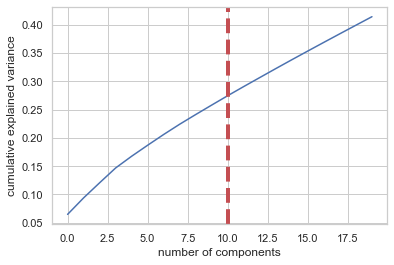

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.064871,0.064871
1,0.093993,0.029121
2,0.120669,0.026676
3,0.146826,0.026157
4,0.167553,0.020727
5,0.186985,0.019432
6,0.205970,0.018985
7,0.224092,0.018121
8,0.241190,0.017098
9,0.257941,0.016752


In [38]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))


Model Report
Accuracy : 0.7627
AUC Score (Train): 0.742606
CV Score : Mean - 0.6653755 | Std - 0.004512331 | Min - 0.6579847 | Max - 0.6703304


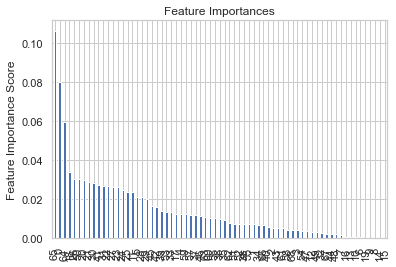

In [39]:
modelfit(RandomForestClassifier(n_estimators = 150, min_samples_split = 3, max_depth =13, 
                                min_samples_leaf = 1, random_state = 42), \
         X_train, y_train, printFeatureImportance=True)


Model Report
Accuracy : 0.7712
AUC Score (Train): 0.797061
CV Score : Mean - 0.6487876 | Std - 0.00400639 | Min - 0.6431298 | Max - 0.6539125


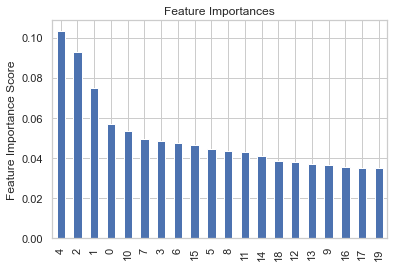

In [40]:
modelfit(RandomForestClassifier(n_estimators = 150, min_samples_split = 3, max_depth =13, 
                                min_samples_leaf = 1, random_state = 42), \
         pca_test.transform(X_train), y_train, printFeatureImportance=True)

In [41]:
rf = RandomForestClassifier(n_estimators = 150, min_samples_split = 3, max_depth =13, 
                                min_samples_leaf = 1, random_state = 42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

C:\Users\gwams\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.7467944312447229

In [42]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, auc, roc_curve

## fit separate trial lengths

In [46]:
week_trials = features[features['trial_length_days'] == 7]
month_trials = features[features['trial_length_days'] == 31]


Model Report
Accuracy : 0.7417
AUC Score (Train): 0.824073
CV Score : Mean - 0.7040261 | Std - 0.008086799 | Min - 0.6932243 | Max - 0.712648


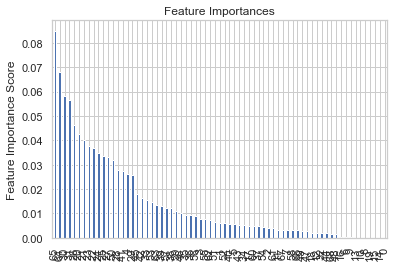

In [49]:
X_week = week_trials.drop(["success"], axis=1)
y_week = week_trials['success']
X_train_week, X_test_week, y_train_week, y_test_week = train_test_split(X_week, y_week, random_state=42)
X_train_week = scaler.fit_transform(X_train_week)
modelfit(RandomForestClassifier(n_estimators = 150, min_samples_split = 3, max_depth =13, 
                                min_samples_leaf = 1, random_state = 42), \
         X_train_week, y_train_week, printFeatureImportance=True)

In [50]:
rf_week = RandomForestClassifier(n_estimators = 150, min_samples_split = 3, max_depth =13, 
                                min_samples_leaf = 1, random_state = 42)
rf_week.fit(X_train_week, y_train_week)
rf_week.score(X_test_week, y_test_week)

C:\Users\gwams\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.6558990067761997


Model Report
Accuracy : 0.778
AUC Score (Train): 0.732518
CV Score : Mean - 0.6378112 | Std - 0.002322871 | Min - 0.6346311 | Max - 0.6414827


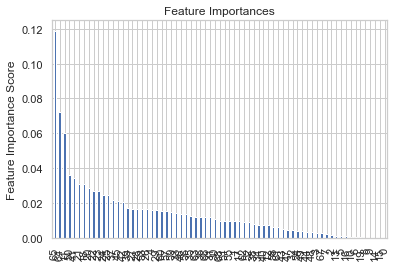

In [51]:
X_month = month_trials.drop(["success"], axis=1)
y_month = month_trials['success']
X_train_month, X_test_month, y_train_month, y_test_month = train_test_split(X_month, y_month, random_state=42)
X_train_month = scaler.fit_transform(X_train_month)
modelfit(RandomForestClassifier(n_estimators = 150, min_samples_split = 3, max_depth =13, 
                                min_samples_leaf = 1, random_state = 42), \
         X_train_month, y_train_month, printFeatureImportance=True)

In [53]:
rf_month = RandomForestClassifier(n_estimators = 150, min_samples_split = 3, max_depth =13, 
                                min_samples_leaf = 1, random_state = 42)
rf_month.fit(X_train_month, y_train_month)
rf_month.score(X_test_month, y_test_month)

C:\Users\gwams\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.776889552982194